In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale


In [7]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [12]:
x_train[:3]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [14]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [19]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [20]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

X: Likely a dataset containing images (e.g., a 3D array where each entry represents an image).<br>

y: Labels corresponding to the images in X.<br>

index: The specific index of the image in X and its corresponding label in y that we want to visualize.


In [21]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

y[index]: Retrieves the label for the image at the specified index.<br><br>
classes[y[index]]: Maps the label (e.g., a numerical label) to its corresponding class name using the classes list or dictionary.

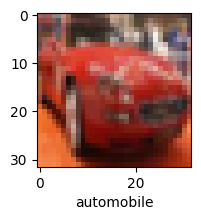

In [26]:
plot_sample(x_train, y_train, 5)

#Bulding 1st simple ANN

In [27]:
x_train = x_train / 255
x_test = x_test / 255


In [38]:
ann  = keras.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
ann.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
ann.fit(x_train,y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2794 - loss: 2.1939
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3960 - loss: 1.6751
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.4293 - loss: 1.5845
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4520 - loss: 1.5237
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4625 - loss: 1.4927


In [40]:
ann.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4402 - loss: 1.5483


[1.5526432991027832, 0.4449000060558319]

In [41]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(ele) for ele in y_pred]

print(f'classification report \n {classification_report(y_test, y_pred_classes)}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
classification report 
               precision    recall  f1-score   support

           0       0.47      0.57      0.51      1000
           1       0.72      0.37      0.49      1000
           2       0.36      0.30      0.32      1000
           3       0.28      0.47      0.35      1000
           4       0.43      0.28      0.34      1000
           5       0.41      0.26      0.32      1000
           6       0.43      0.64      0.52      1000
           7       0.57      0.41      0.47      1000
           8       0.47      0.73      0.57      1000
           9       0.58      0.42      0.48      1000

    accuracy                           0.44     10000
   macro avg       0.47      0.44      0.44     10000
weighted avg       0.47      0.44      0.44     10000



#Building convolutional neural network

In [51]:
cnn = keras.Sequential([
    #cnn
    layers.Conv2D(filters=32 , kernel_size=(3,3) , activation='relu' , input_shape = (32,32,3)),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(filters=64 , kernel_size=(3,3) , activation='relu'),
    layers.MaxPool2D((2,2)),


    #ann
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='softmax'),

])

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#cnn = keras.Sequential and cnn = models.Sequential
keras.Sequential:<br>
Accesses the Sequential class directly from the top-level keras module in TensorFlow.

models.Sequential:<br>
Accesses the Sequential class from the models submodule of keras.

In [52]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3472 - loss: 1.8064
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5757 - loss: 1.2066
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6368 - loss: 1.0442
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6730 - loss: 0.9339
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7064 - loss: 0.8528
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7245 - loss: 0.7954
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7456 - loss: 0.7328
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7648 - loss: 0.6812
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7769 - loss: 0.6456
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7947 - loss: 0.6016


In [53]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7126 - loss: 0.8825


[0.8904687762260437, 0.7074000239372253]

In [54]:
y_test  = y_test.reshape(-1,)


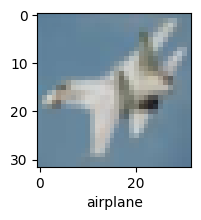

In [55]:
plot_sample(x_test, y_test, 10)

In [59]:
classes[y_test[10]]

'airplane'

In [69]:
y_pred_cnn = cnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [70]:
y_pred_classes_cnn = [np.argmax(ele) for ele in y_pred_cnn]
classes[y_pred_classes_cnn[10]]

'airplane'

In [71]:


print(f'classification report \n {classification_report(y_test, y_pred_classes_cnn)}')

classification report 
               precision    recall  f1-score   support

           0       0.68      0.80      0.74      1000
           1       0.83      0.80      0.82      1000
           2       0.61      0.62      0.62      1000
           3       0.54      0.51      0.52      1000
           4       0.69      0.63      0.66      1000
           5       0.59      0.65      0.62      1000
           6       0.81      0.74      0.78      1000
           7       0.75      0.74      0.75      1000
           8       0.85      0.76      0.80      1000
           9       0.74      0.82      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

